## Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Read and Show the Image

In [7]:
image =cv2.cvtColor(cv2.imread("test_image.jpg"), cv2.COLOR_BGR2RGB) 

plt.imshow(image)
plt.show()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-m8us58q4\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [8]:
image.shape

NameError: name 'image' is not defined

## Convert to Gray Scale

In [4]:
image_g = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap='gray')

NameError: name 'image' is not defined

In [5]:
image_g.shape

NameError: name 'image_g' is not defined

## Gaussian Blurring and Canny

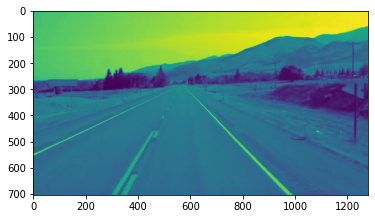

In [39]:
image_blurred = cv2.GaussianBlur(image_g, (7,7), 0)
plt.imshow(image_blurred)

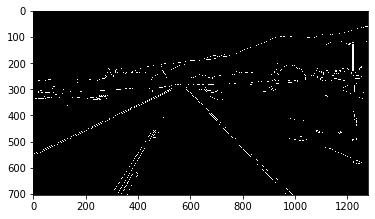

In [40]:
threshold_low = 10
threshold_high = 100

image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)

plt.imshow(image_canny, cmap='gray')

## Define the Region of Interest

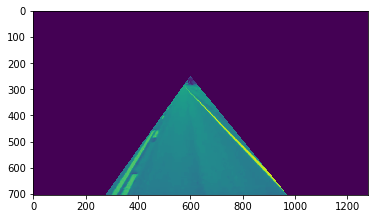

In [41]:
# Visualizing the region of interest

height = 740
vertices = np.array([[(250,height), (1000,height), (600,250)]])
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

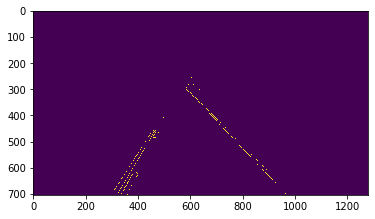

In [42]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

## Hough Line Detection

In [43]:
rho = 2                  # distance resolution in pixel
theta = np.pi/180        # angular resolution in radians
threshold = 40           # minimum number of votes
min_line_len = 40       # minimum no. of pixel making up a line
max_line_gap = 5        # maximum gap in pixels between connectable line segments

lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

In [44]:
# create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype = np.uint8)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)

lines

array([[[678, 391, 755, 468]],

       [[808, 536, 969, 702]],

       [[331, 684, 451, 483]],

       [[355, 615, 448, 471]],

       [[651, 370, 710, 431]],

       [[588, 299, 684, 395]],

       [[705, 419, 888, 602]],

       [[787, 514, 832, 559]],

       [[353, 672, 379, 625]],

       [[595, 313, 654, 372]],

       [[321, 701, 356, 644]],

       [[301, 698, 330, 654]],

       [[859, 588, 906, 636]],

       [[391, 585, 419, 538]]], dtype=int32)

In [45]:
a = 1
b = 1
c = 0

#Resultant weighted image is calculated as follows: original_image * a + img*b + c
Image_with_lines = cv2.addWeighted(image, a, line_image, b, c)

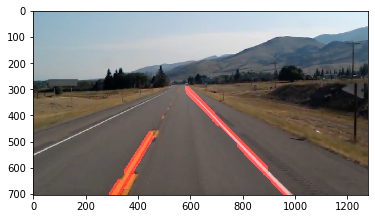

In [46]:
plt.figure()
plt.imshow(Image_with_lines)